In [1]:
pip install numpy==1.18.4

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas==1.3.4

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [8]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Exploring columns

In [12]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

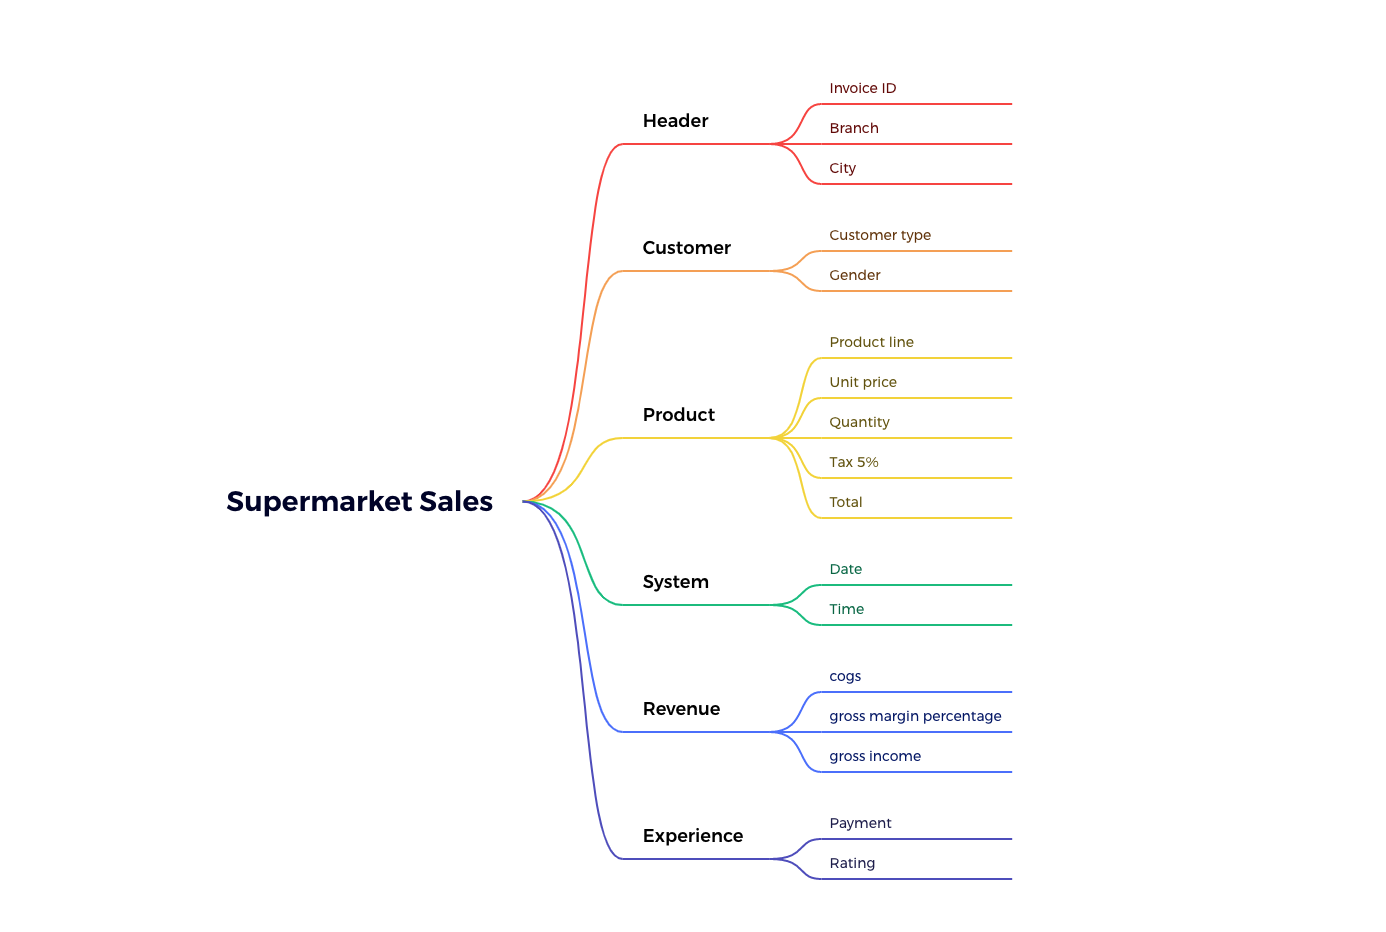

In [25]:
df.describe(include='all').round(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000,1000.00,1000.00,1000.00,1000.00,1000,1000,1000,1000.00,1000.00,1000.00,1000.00
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,89,506,3,NaN,NaN,NaN,NaN
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,2/7/2019,19:48,Ewallet,NaN,NaN,NaN,NaN
freq,1,340,340,501,501,178,NaN,NaN,NaN,NaN,20,7,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,55.67,5.51,15.38,322.97,NaN,NaN,NaN,307.59,4.76,15.38,6.97
std,NaN,NaN,NaN,NaN,NaN,NaN,26.49,2.92,11.71,245.89,NaN,NaN,NaN,234.18,0.00,11.71,1.72
min,NaN,NaN,NaN,NaN,NaN,NaN,10.08,1.00,0.51,10.68,NaN,NaN,NaN,10.17,4.76,0.51,4.00
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.88,3.00,5.92,124.42,NaN,NaN,NaN,118.50,4.76,5.92,5.50
50%,NaN,NaN,NaN,NaN,NaN,NaN,55.23,5.00,12.09,253.85,NaN,NaN,NaN,241.76,4.76,12.09,7.00
75%,NaN,NaN,NaN,NaN,NaN,NaN,77.94,8.00,22.45,471.35,NaN,NaN,NaN,448.90,4.76,22.45,8.50


In [82]:
def explore_columns(df):
    the_cols = ["Invoice ID", "Branch", "City", "Customer type", "Gender", "Product line", "Payment"]
    for i in the_cols:
        # when values are unique
        print("\n",i,"\n")
        if df[i].count() == df[i].nunique():
            print("Unique")
            print("Min",df[i].min())
            print("Max",df[i].max())
            print(df[i].isnull().sum())
        # when values are not unique
        else:
            print("Null Count:",df[i].isnull().sum())
            print(df[i].value_counts())
            #print(df[i].value_counts(normalize=True)*100)
    return 0

In [83]:
explore_columns(df)


 Invoice ID 

Unique
Min 101-17-6199
Max 898-04-2717
0

 Branch 

Null Count: 0
A    340
B    332
C    328
Name: Branch, dtype: int64

 City 

Null Count: 0
Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

 Customer type 

Null Count: 0
Member    501
Normal    499
Name: Customer type, dtype: int64

 Gender 

Null Count: 0
Female    501
Male      499
Name: Gender, dtype: int64

 Product line 

Null Count: 0
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

 Payment 

Null Count: 0
Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64


0